In [1]:
from fontTools.ttLib import TTFont
from fontTools.unicode import Unicode
import os
import unicodedata
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import shutil
from PIL import ImageFont

In [2]:
dir_gen = os.walk('valid_fonts/')
font_files = next(dir_gen)

In [3]:
charecters_of_interest = ' !"%&()*+,-./0123456789:=ABCDEFGHIJKLMNOPQRSTUVWXYZ\\_abcdefghijklmnopqrstuvwxyz|~ЁАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯабвгдежзийклмнопрстуфхцчшщъыьэюяё№'

In [ ]:
valid_fonts = []
for ff in tqdm(font_files[2]):
    with TTFont(font_files[0] + ff) as ttf:
        chars = []
        for x in ttf["cmap"].tables:
            for y in x.cmap.items():
                try:
                    char = unicodedata.lookup(Unicode[y[0]])
                    chars.append(char)
                except:
#                     print('Can not add char {}'.format(Unicode[y[0]]))
                    continue
    if set(charecters_of_interest).issubset(set(chars)):
        font = ImageFont.truetype(os.path.join(font_files[0], ff), size=30)
        size = font.getsize('Hello world')
        if any(v == 0 for v in size):
            print(size)
            break
        valid_fonts.append(ff)

 95%|█████████▍| 531/559 [05:25<00:17,  1.63it/s]

In [26]:
font = ImageFont.truetype(os.path.join(font_files[0], ff), size=30)
# font = ImageFont.truetype('valid_fonts/Alegreya-Black.ttf', size=30)

In [27]:
im = Image.new('L',(300,300),255)

In [28]:
draw = ImageDraw.Draw(im)
draw.text((0,0),'Hello world',font=font,fill=0)

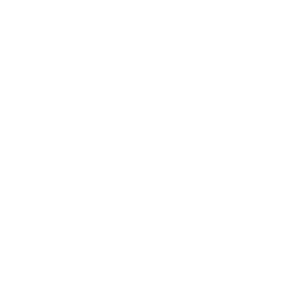

In [29]:
im

In [4]:
random_string = ''.join(np.random.choice(list(charecters_of_interest), size=50, replace=False))

In [5]:
dir_gen = os.walk('valid_fonts/')
valid_fonts = next(dir_gen)

0
RubikMonoOne-Regular.ttf


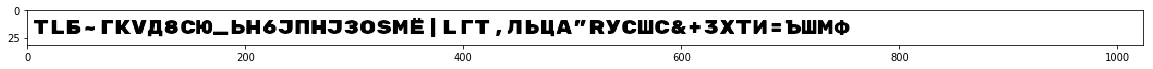

1
NotoSerif-Regular.ttf


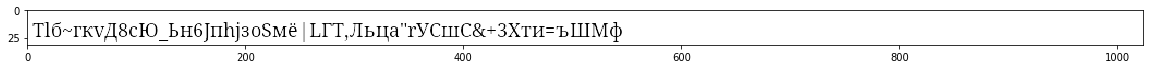

2
FiraSansExtraCondensed-ExtraLightItalic.ttf


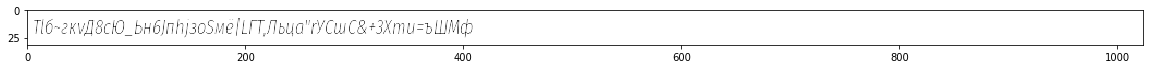

3
AlegreyaSC-BoldItalic.ttf


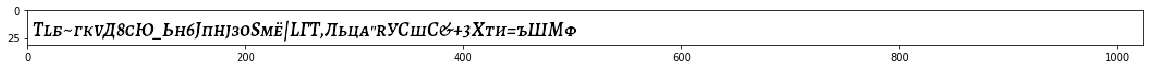

4
IBMPlexMono-ExtraLight.ttf


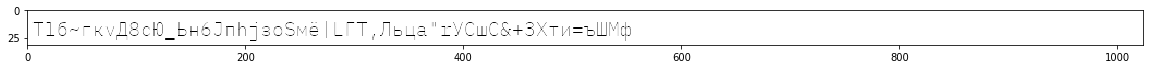

5
IBMPlexMono-Thin.ttf


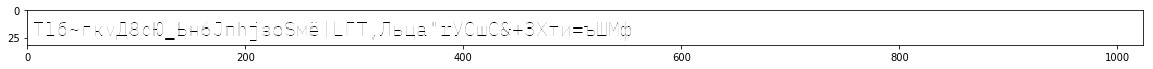

6
CormorantInfant-BoldItalic.ttf


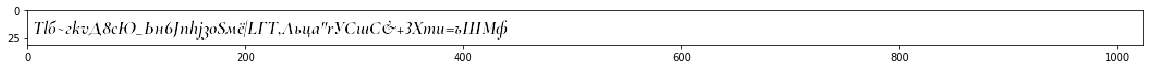

7
SpectralSC-Regular.ttf


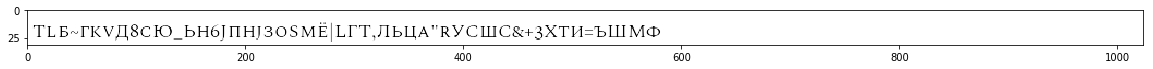

8
NotoSerif-Italic.ttf


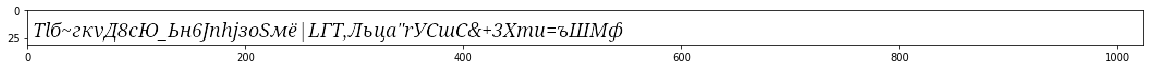

9
Vollkorn-Italic-VFBeta.ttf


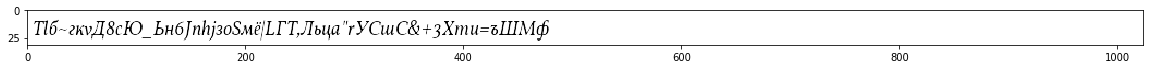

10
NotoSans-BoldItalic.ttf


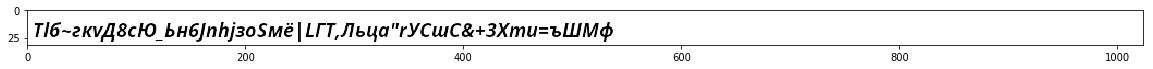

11
StalinOne-Regular.ttf


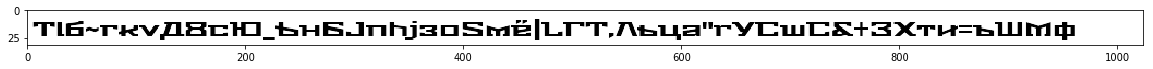

12
YesevaOne-Regular.ttf


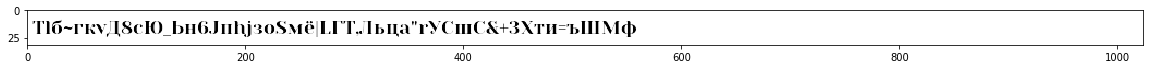

13
SeoulNamsanCondensed-ExtraBold.ttf


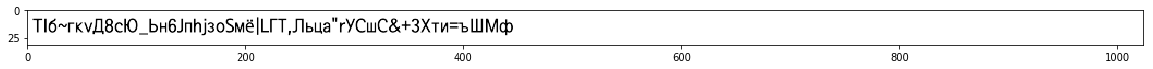

14
Cormorant-Italic.ttf


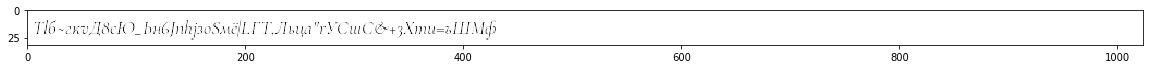

15
Mplus1p-Light.ttf


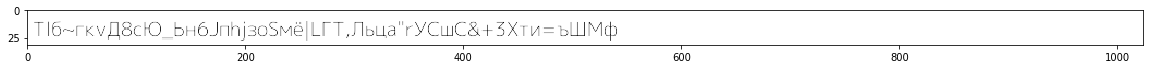

16
Cuprum-Regular.ttf


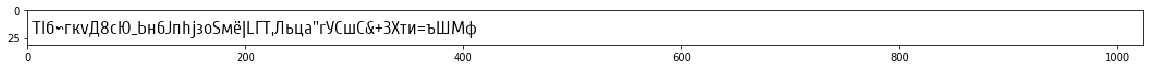

17
SeoulHangangCondensed-Light.ttf


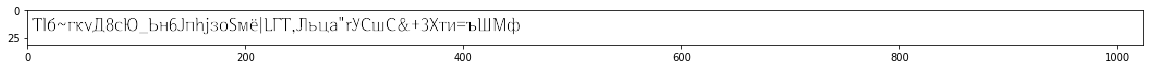

18
FiraSansCondensed-Light.ttf


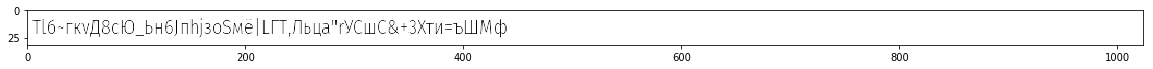

19
Lato-Italic.ttf


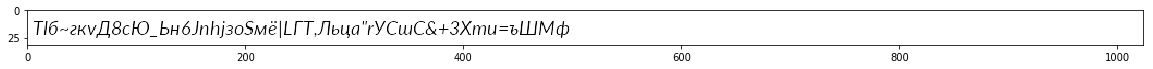

20
IBMPlexSans-BoldItalic.ttf


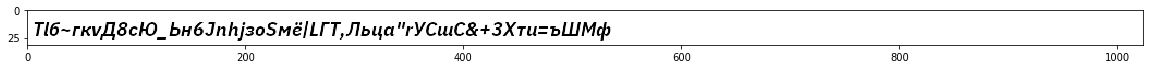

21
Oswald-Medium.ttf


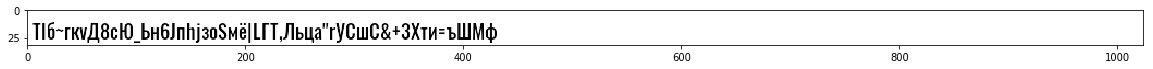

22
RoundedMplus1c-Bold.ttf


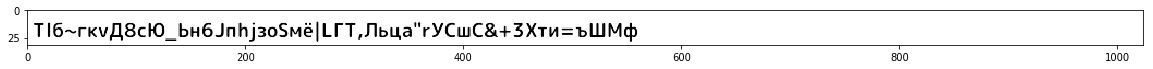

23
Spectral-Bold.ttf


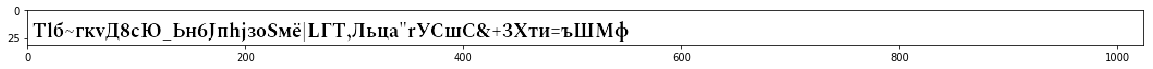

24
AlegreyaSC-MediumItalic.ttf


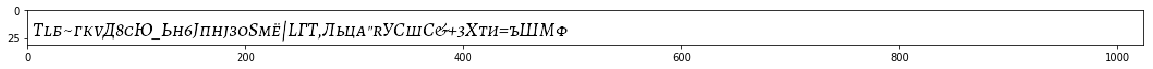

25
MontserratAlternates-SemiBold.ttf


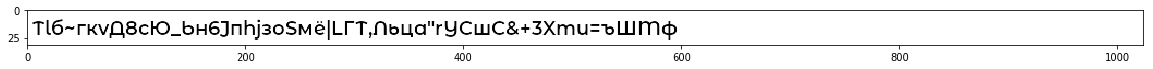

26
FiraSansExtraCondensed-SemiBoldItalic.ttf


KeyboardInterrupt: 

In [9]:
plt.rcParams['figure.figsize'] = (20,20)
cant_print = []
for n, vf in enumerate(valid_fonts[2]):
    print(n)
    print(vf)
    txt = Image.new('RGBA', (256*4,32), (255,255,255,0))
    fnt = ImageFont.truetype(valid_fonts[0] + vf, 18)
    d = ImageDraw.Draw(txt)
    try:
        d.text((5,5), random_string, font=fnt, fill=(0,0,0,255))
    except: 
        cant_print.append(vf) # collect fons which couldn't be plot for some reason
        continue
    plt.imshow(np.asarray(txt))
    plt.show()